In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [3]:
df=pd.read_csv("EastWestAirlines.csv",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [4]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

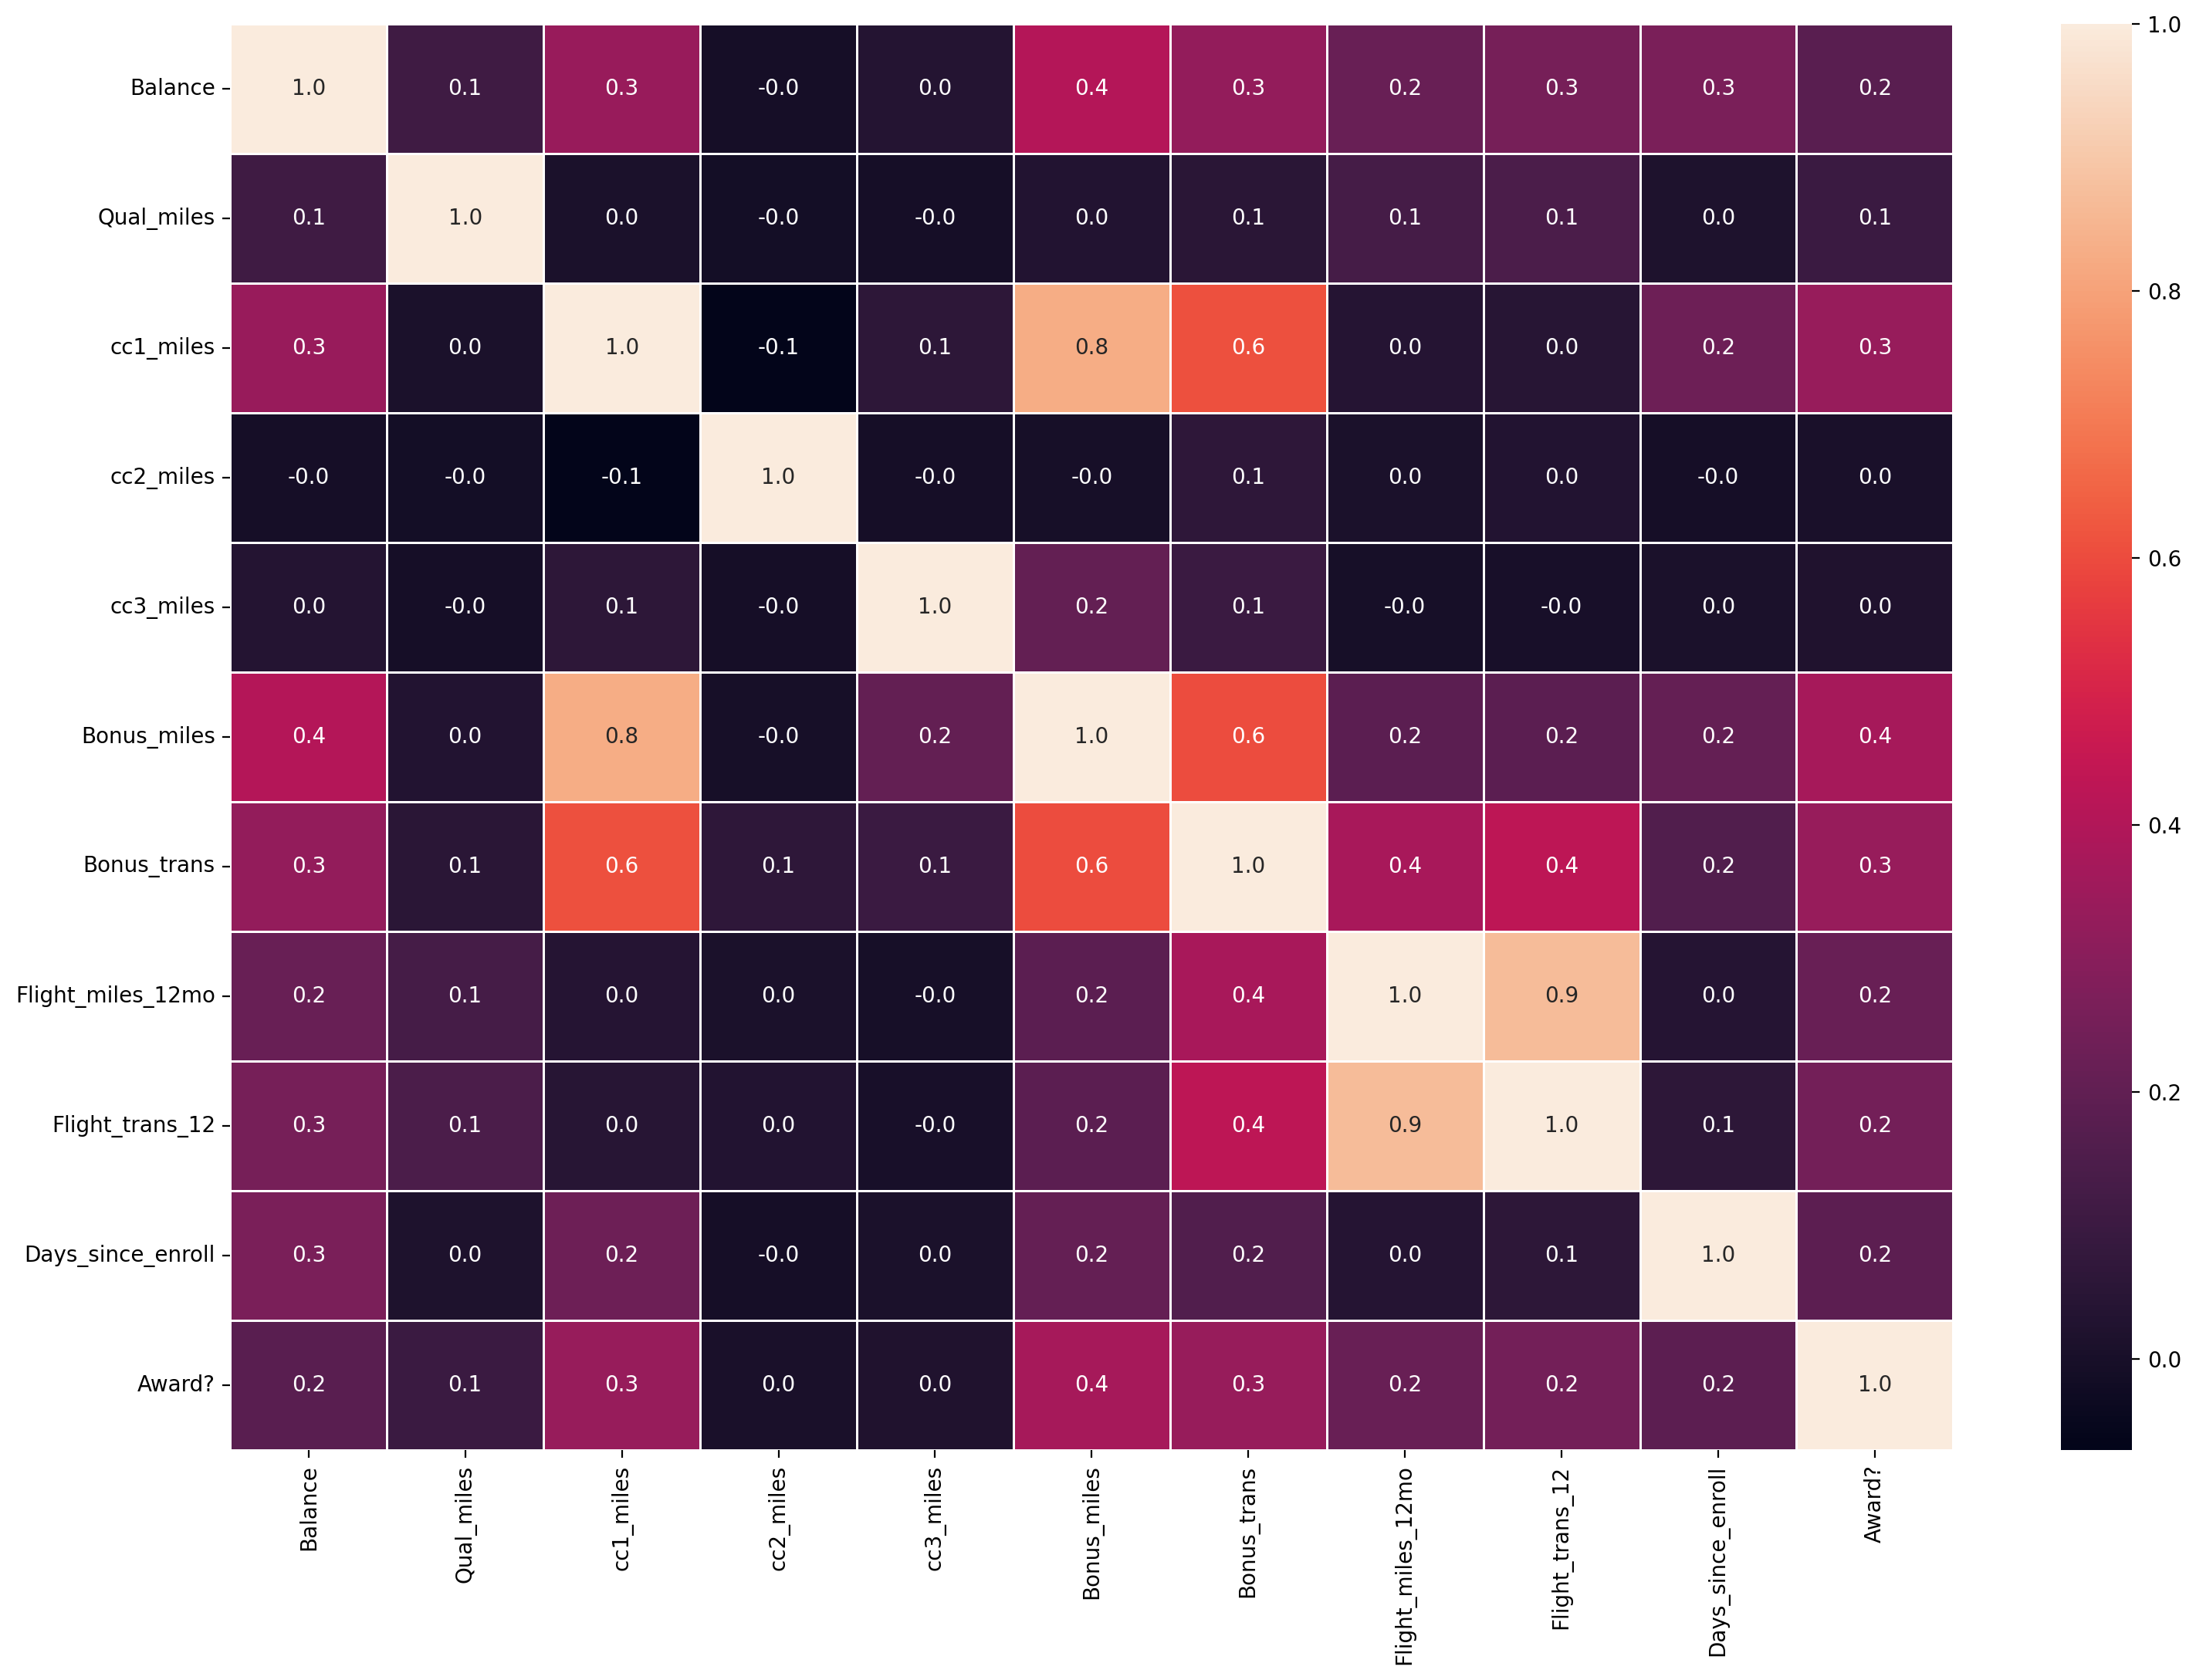

In [9]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

<Axes: >

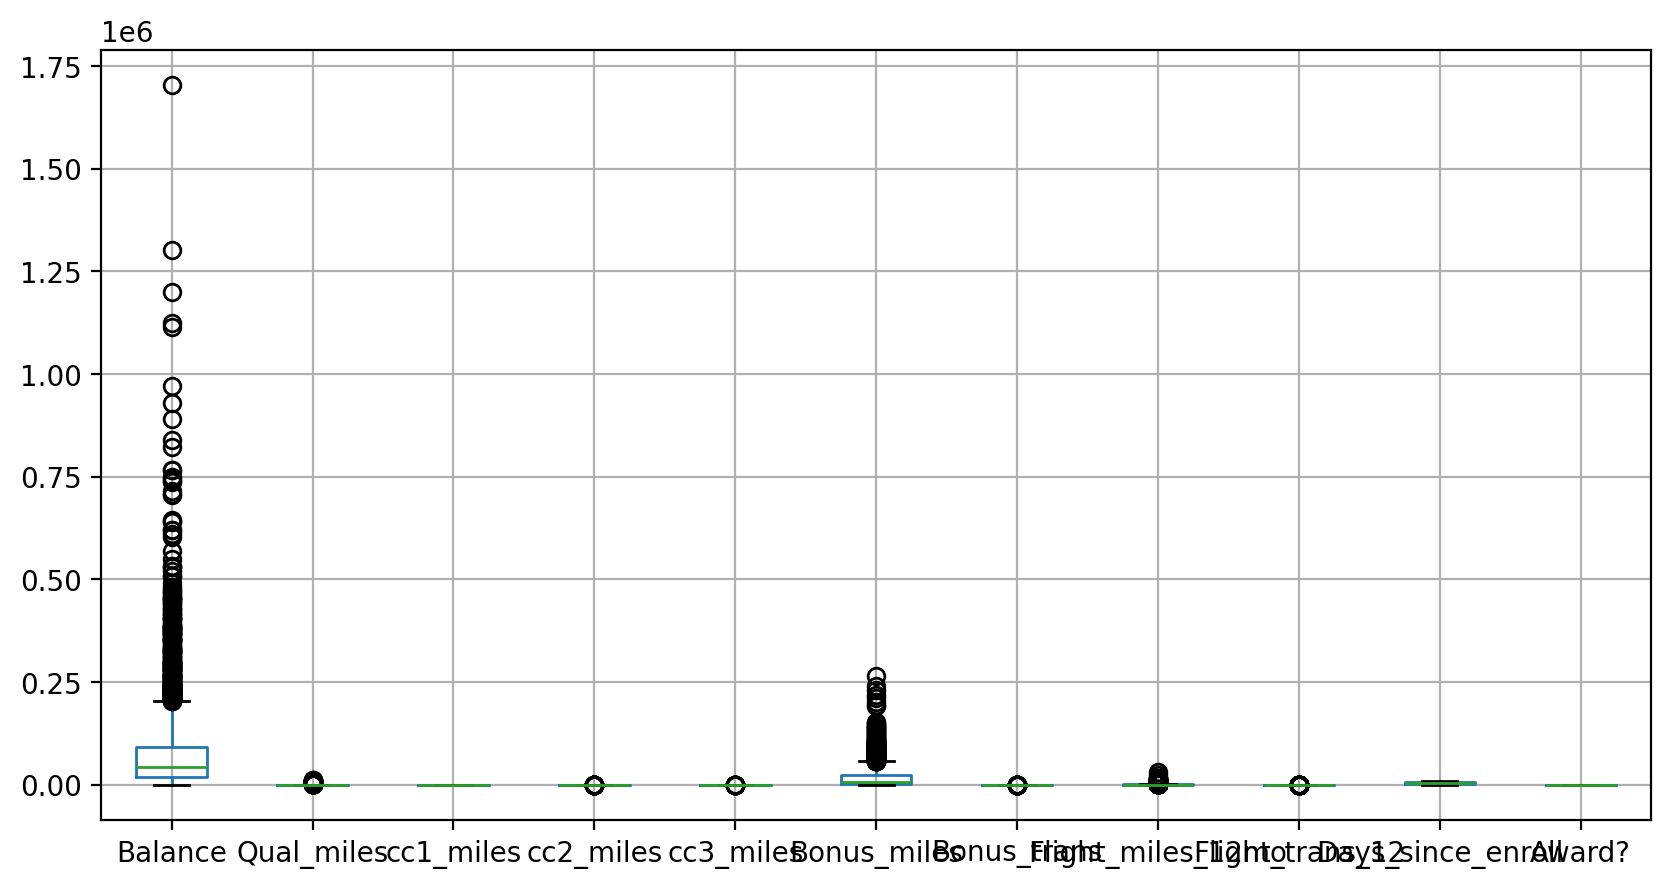

In [10]:
df.boxplot()

In [11]:
feature_cols = df.columns.drop('Award?')
features_df = df[feature_cols].copy()

def capping(data, columns):
    df_capped = data.copy() # Work on a copy
    for col in columns:
        q1 = df_capped[col].quantile(0.25)
        q3 = df_capped[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

features=capping(features_df, feature_cols)

<Axes: >

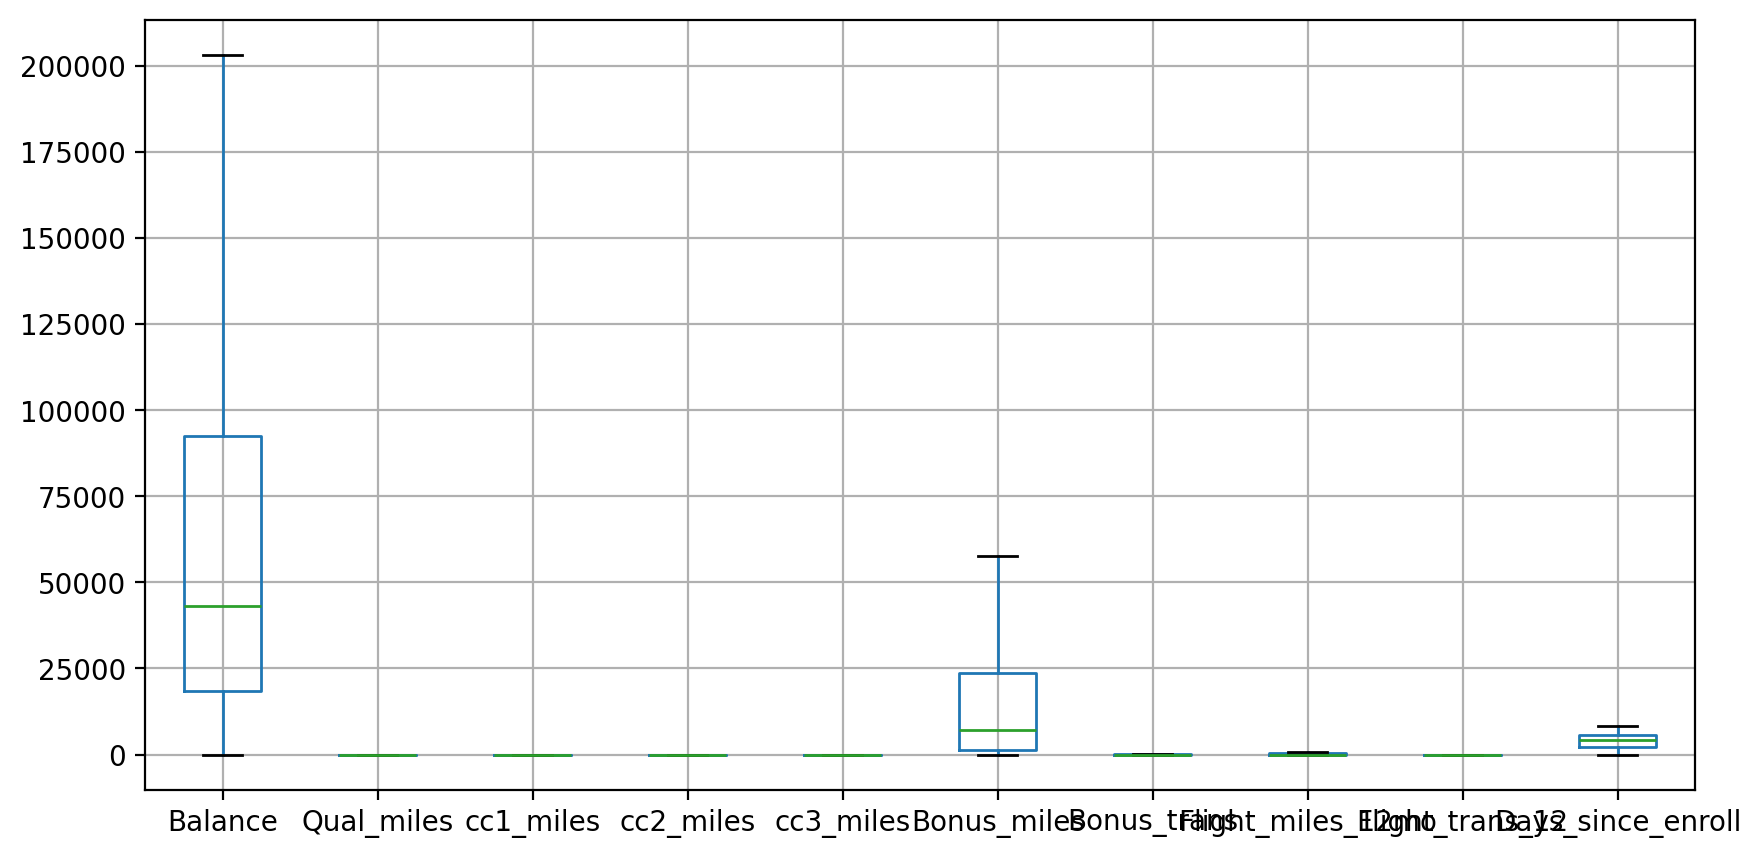

In [12]:
features.boxplot()


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
x=sc.fit_transform(features)

# Create the final scaled features DataFrame for clustering
scaled_features_df = pd.DataFrame(x,columns=feature_cols,index=df.index)

In [15]:
scaled_features_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
ID#,,,,,,,,,,
1,-0.607541,0.0,-0.769732,0.0,0.0,-0.843179,-1.149253,-0.603723,-0.626252,1.395235
2,-0.759235,0.0,-0.769732,0.0,0.0,-0.840911,-1.039523,-0.603723,-0.626252,1.379736
3,-0.382343,0.0,-0.769732,0.0,0.0,-0.624728,-0.820064,-0.603723,-0.626252,1.411702
4,-0.835397,0.0,-0.769732,0.0,0.0,-0.825145,-1.149253,-0.603723,-0.626252,1.371987
5,0.579028,0.0,1.409207,0.0,0.0,1.542468,1.593991,2.039825,2.019866,1.363754
...,...,...,...,...,...,...,...,...,...,...
4017,-0.772326,0.0,-0.769732,0.0,0.0,-0.381218,-0.820064,0.070867,0.432195,-1.315506
4018,0.010248,0.0,-0.769732,0.0,0.0,-0.798537,-0.710334,-0.603723,-0.626252,-1.319381
4019,0.167277,0.0,0.682894,0.0,0.0,0.554875,-0.381145,-0.603723,-0.626252,-1.315990


In [16]:
from scipy.cluster import hierarchy

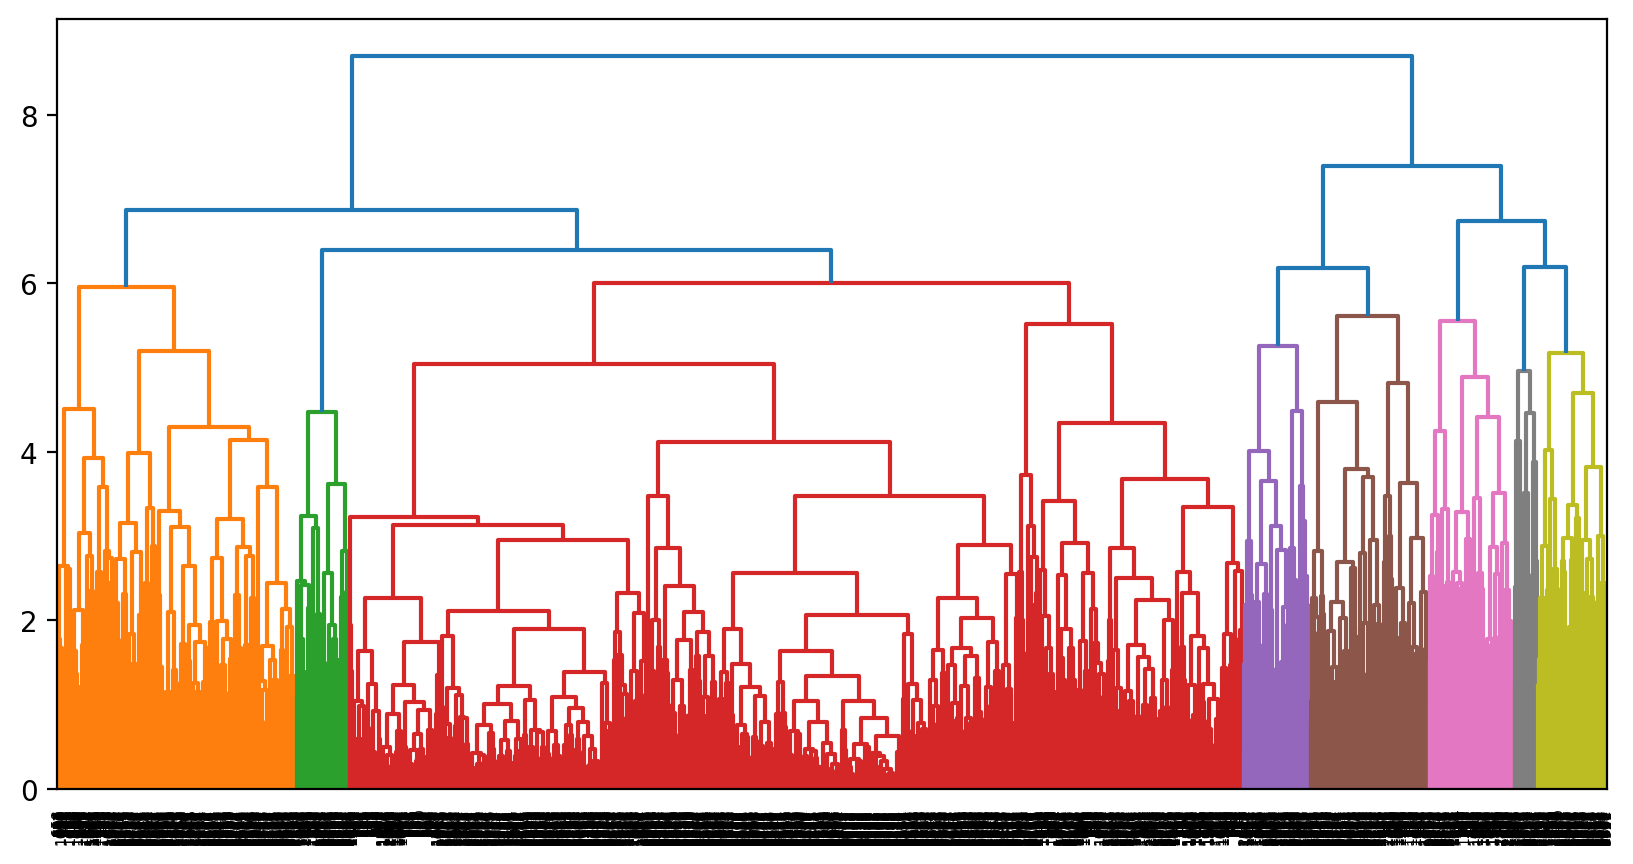

In [17]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [18]:
#from the above dendogram no. of clusters are 7

In [19]:
#hierarchical clustering model building

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
hc=AgglomerativeClustering(n_clusters=7)
hierarchycluster=hc.fit_predict(x)
hierarchycluster

array([4, 4, 4, ..., 0, 3, 5], dtype=int64)

In [22]:
df['cluster']=hierarchycluster
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,4
2,19244,0,1,1,1,215,2,0,0,6968,0,4
3,41354,0,1,1,1,4123,4,0,0,7034,0,4
4,14776,0,1,1,1,500,1,0,0,6952,0,4
5,97752,0,4,1,1,43300,26,2077,4,6935,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
4018,64385,0,1,1,1,981,5,0,0,1395,1,5
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [23]:
df['cluster'].unique()

array([4, 6, 0, 3, 1, 2, 5], dtype=int64)

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
hc_silhouette = silhouette_score(x,hierarchycluster )
print("Silhouette score for hierarchical cluster model is:",hc_silhouette)

Silhouette score for hierarchical cluster model is: 0.1957291787442593


In [26]:
#0.1957291787442593  is not good score there can be overlapping in cluster

In [27]:
#k means clustering model

In [28]:
from sklearn.cluster import KMeans


In [29]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [30]:
wcss

[27986.0,
 18908.04985978777,
 14312.089421092358,
 11946.27465799603,
 10689.940934164197,
 10065.305682107459,
 8700.663873583342,
 8147.234206188769,
 7722.326571135605,
 7270.643277466362]

Text(0.5, 1.0, 'Elbow Graph')

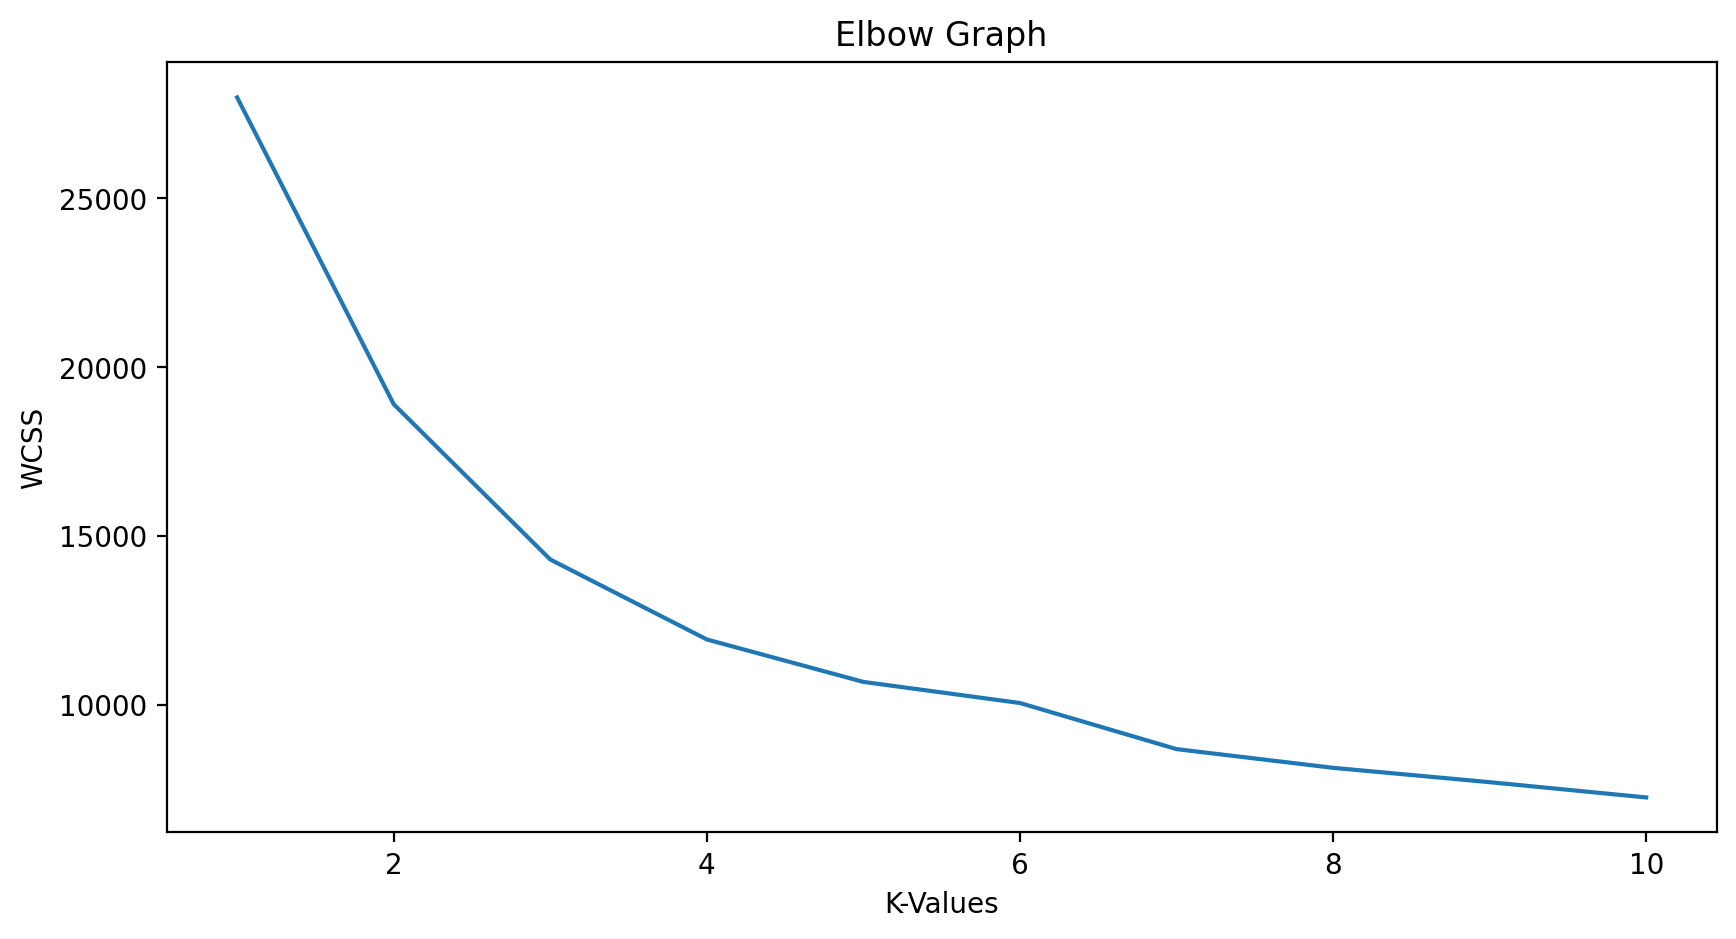

In [31]:
plt.plot(range(1,11),wcss)
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [32]:
km = KMeans(n_clusters=6)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 5, 4, 4])

In [33]:
silhouette_score(x,ypred)

0.2701525181053129

In [34]:
from sklearn.cluster import DBSCAN

In [45]:
db = DBSCAN(eps = 0.5, min_samples=3)

ydbscan = db.fit_predict(x)
ydbscan

array([ 0,  0,  0, ...,  6, 13,  0], dtype=int64)

In [47]:
silhouette_score(x,ydbscan)

-0.17642842301537315

In [49]:
#-0.17 is bad so we need to do hyperparameter tuning

Hyperparameter tunning

In [52]:
from sklearn.neighbors import NearestNeighbors

In [54]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [56]:
d , i = neigh.kneighbors(x)

In [58]:
distance = np.sort(d[:,1])
distance

array([0.00323878, 0.00323878, 0.00331812, ..., 1.72348198, 1.78637999,
       1.85673725])

In [60]:
db = DBSCAN(eps=1.5, min_samples=5)
ydb = db.fit_predict(x)
ydb.size


3998

In [62]:
silhouette_score(x,ydb)

0.31063748677492087